In [96]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import scipy.optimize as opt
import numpy.random as rnd
import networkx as nx

## Gaussian graph generation

In [97]:
""" Generates a gaussian weighted graph """
def create_gaussian_graph(n, scale_weights=None):
    G = nx.complete_graph(n)
    for i in range(n): # I didn't find a nicer way to add self loops
        G.add_edge(i, i)
    sigma = 1/n
    if scale_weights:
        weights = {e:(rnd.normal(0.0,2*sigma)*scale_weights if e[0]==e[1] else rnd.normal(0.0,2*sigma))*scale_weights for e in G.edges}
    weights = {e:(rnd.normal(0.0,2*sigma) if e[0]==e[1] else rnd.normal(0.0,2*sigma)) for e in G.edges}
    nx.set_edge_attributes(G, values = weights, name = 'weight')
    return G

""" Gets the weights dictionary from a gaussian weighted graph """
def get_weights(G):
    return {(e[0],e[1]):e[2] for e in G.edges.data('weight')}

""" Plots a graph """
def plot_graph(G):
    plt.rcParams['figure.figsize'] = [13, 7]
    _cmap = plt.get_cmap('RdBu')
    _weights = get_weights(G)
    _wcolor = {_cmap(v) for k,v in _weights.items()}
    ax, fig = plt.subplots()
    ax = nx.draw(G, edge_color=_wcolor,node_color = 'k',width = 2)
    plt.show()

## Permutation matrix generation

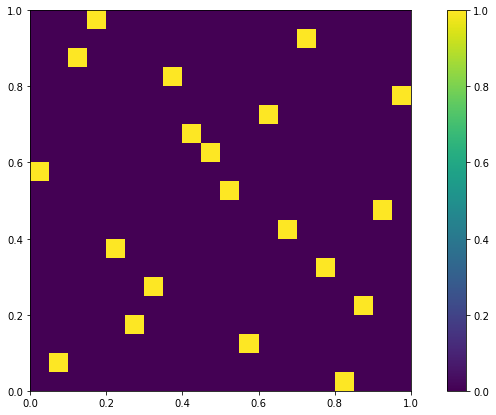

In [52]:
def basis_vec(i,n):
    v = np.zeros((1,n))
    v[0,i] = 1
    return v

""" Generates a random permutation matrix """
def p_matrix(n):
    p = rnd.permutation(n)
    return np.array([basis_vec(i,n)[0,:] for i in p]), p

def plot_matrix(M):
    plt.rcParams['figure.figsize'] = [13, 7]
    plt.imshow(M, extent=[0, 1, 0, 1])
    plt.colorbar()
    plt.show()

P,_ = p_matrix(20)
plot_matrix(P)

## Gaussian Wigner Matching Model

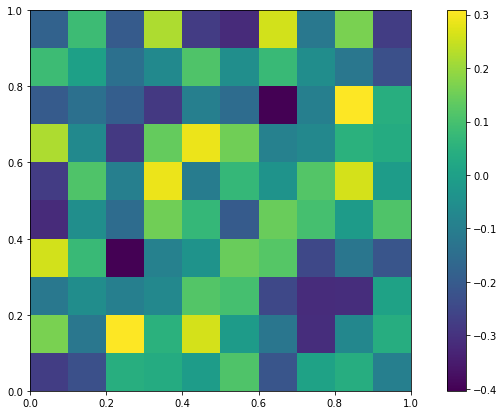

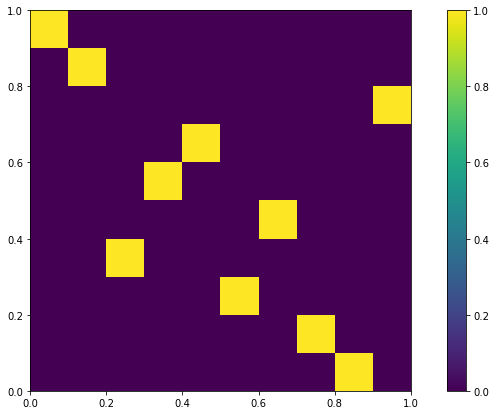

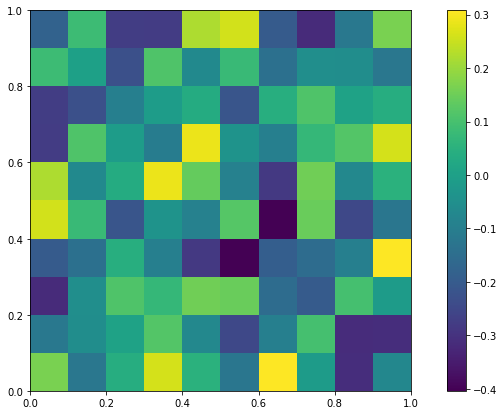

In [4]:
n = 10
A = nx.adjacency_matrix(create_gaussian_graph(n)).toarray()
P,_ = p_matrix(n)
plot_matrix(A)
plot_matrix(P)
plot_matrix(P@A@la.inv(P))


In [101]:
""" generates a gauss wigner matching model with noise """
def gauss_wigner(n, sigma):
    P, p = p_matrix(n)
    A = nx.adjacency_matrix(create_gaussian_graph(n)).toarray()
    sZ = nx.adjacency_matrix(create_gaussian_graph(n,sigma)).toarray()
    ipB = A + sZ
    B = la.inv(P)@ipB@P # inverse permutation
    return A, B, P, p

In [108]:
n = 10
sigma = 0.000
A, B, P, p  = gauss_wigner(n, sigma)


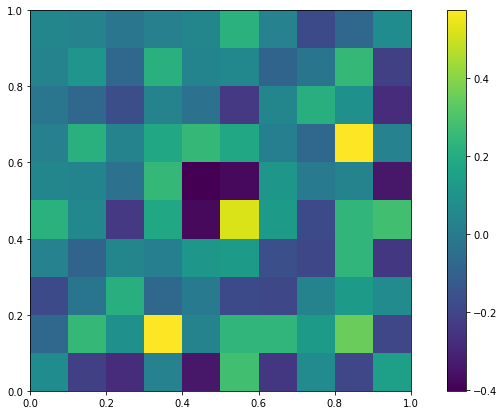

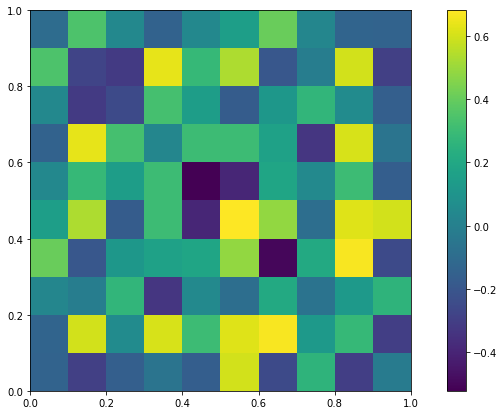

In [109]:
plot_matrix(A)
# plot_matrix(B)
# plot_matrix(P)
plot_matrix(P@B@la.inv(P))

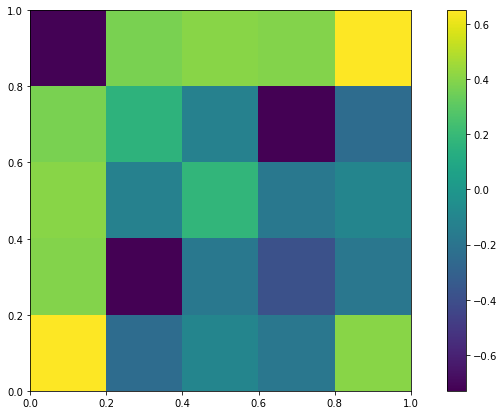

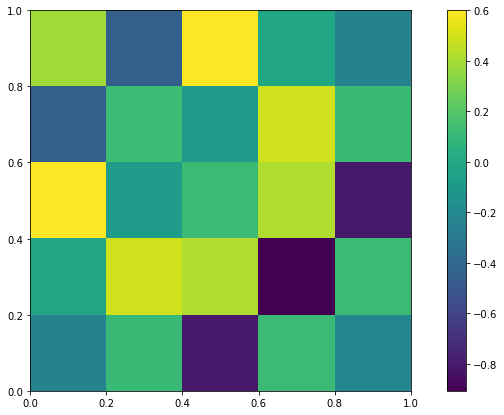

In [6]:
A, B, P, p = gauss_wigner(5,0.00001)
# plot_graph(nx.from_numpy_matrix(A))
# plot_graph(nx.from_numpy_matrix(B))
plot_matrix(A)
plot_matrix(B)

## Naive Alg impementation

In [114]:
def similarity(A,B,n,eta):
    def kernel(x,y):
        return 1/((x-y)**2+eta**2)
    lambdas, us = la.eig(A)
    mus, vs = la.eig(B)
    J = np.ones((n,n))
    sim = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            sim += kernel(lambdas[i], mus[j]) * (np.outer(us[:,i],us[:,i])@J@np.outer(vs[:,j],vs[:,j]))
    return sim

def alg(A,B,n,eta):
    sim = similarity(A,B,n,eta)
    p = opt.linear_sum_assignment(sim.transpose())
    return sim, p
    

[8 0 2 9 6 7 4 3 1 5]
[6 7 9 5 8 3 0 1 4 2]


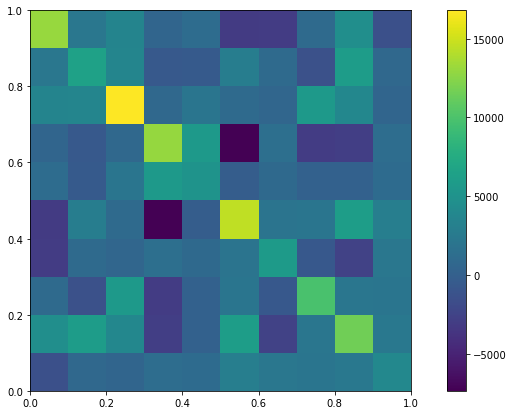

In [120]:
n = 10
sigma = 0.0001
eta = 0.01
A, B, P, p = gauss_wigner(n, sigma)
X, perm = alg(A,A,n,eta)
print(p)
print(perm[1])
plot_matrix(X)
P = np.array([basis_vec(i,n)[0,:] for i in p])
Perm = np.array([basis_vec(i,n)[0,:] for i in perm[1]])

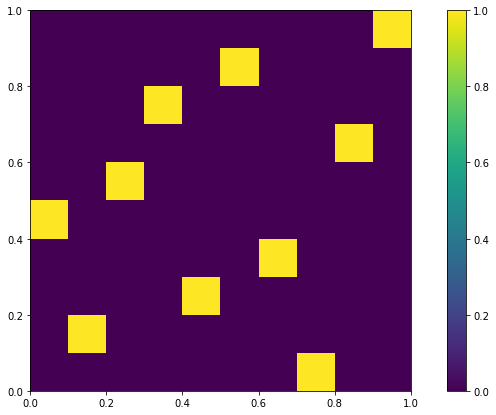

In [94]:
plot_matrix(P)

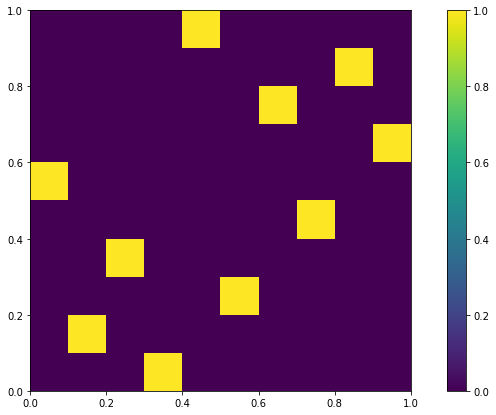

In [95]:
plot_matrix(Perm)